# Sentiment Analysis Pilpres 2024 Naive bayes classifier
M Fahd Ishamuddin
<br>
<br>

41155050180048
<hr>

In [49]:
%matplotlib inline

import re #regex
import string #string
import pandas as pd #dataframe
import numpy as np #array dan matematika lainnya
import matplotlib.pyplot as plt # data visualisasi
import seaborn as sns #data visualisasi
import collections
import nltk #natural language toolkit
from nltk.tokenize import word_tokenize #tokenisasi
from nltk.sentiment import SentimentIntensityAnalyzer #intensitas sentimen 
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory #stopword remover
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory #stemming

In [50]:
data = pd.read_csv('2023sen11.csv')
data1 = pd.read_csv('2022sen.csv')
print('data ada sebanyak',len(data),'baris')
print('data1 ada sebanyak',len(data1),'baris')
data1 = data1.drop(['Unnamed: 0', 'id'], axis = 1)
data = data.drop('Unnamed: 0', axis = 1)
print(data.columns)
print(data.dtypes)
print(data1.columns)
print(data1.dtypes)

data ada sebanyak 5000 baris
data1 ada sebanyak 112844 baris
Index(['date', 'username', 'tweet'], dtype='object')
date        object
username    object
tweet       object
dtype: object
Index(['date', 'tweet', 'username'], dtype='object')
date        object
tweet       object
username    object
dtype: object


In [51]:
data = data.iloc[:,[0,2,1]]

In [52]:
data.columns

Index(['date', 'tweet', 'username'], dtype='object')

#### fix dataset

In [53]:
duplikasi = len(data.tweet)-len(data.tweet.drop_duplicates())
print(f'ada sebanyak {duplikasi} data yang terduplikasi')

duplikasi1 = len(data1.tweet)-len(data1.tweet.drop_duplicates())
print(f'ada sebanyak {duplikasi1} data yang terduplikasi')

ada sebanyak 2254 data yang terduplikasi
ada sebanyak 1993 data yang terduplikasi


In [54]:
x = data.groupby(data.tweet.tolist(), as_index=False).size()
x.sort_values(by='size',ascending=False)



,index,size
2189,RT @PutraErlangga95: Hii tweps mari kita polli...,1848
784,Akademisi: Pasangan Prabowo-Erick Beri Efek Po...,36
786,Akademisi: Pasangan Prabowo-Erick Thohir Beri ...,36
1093,Gerindra Jatim Target Prabowo Harus Menang 65 ...,36
1140,Gerindra yakin pengaruh dukungan Presiden Joko...,11
...,...,...
926,Direktur Eksekutif Charta Politika Yunarto Wij...,1
927,Direktur Eksekutif Charta Politika Yunarto Wij...,1
928,Direktur Eksekutif Charta Politika Yunarto Wij...,1
929,Direktur Eksekutif Indikator Politik Indonesia...,1


In [55]:
a = (x['size'] > 1).sum()
print(f'jadi ada tweet sebanyak {a} yang memiliki cuitan yang sama dengan total {duplikasi} tweet')

jadi ada tweet sebanyak 113 yang memiliki cuitan yang sama dengan total 2254 tweet


In [56]:
data = data.drop_duplicates(subset=['tweet'])

In [57]:
len(data)

2746

In [58]:
y = data1.groupby(data1.tweet.tolist(), as_index=False).size()
y.sort_values(by='size',ascending=False)

,index,size
97150,Saya dukung di pilpres 2024 ya pak @ridwankamil,40
34625,@rkij_sukabumi @ridwankamil Saya dukung di pil...,34
38024,AHY Minim Prestasi Tapi Nekad Maju Pilpres htt...,32
41674,Anis merupakan sosok yang tidak cocok untuk me...,29
1145,#Mangkrak.\nsiapa yang betah+doyan dikibulin d...,29
...,...,...
36973,@wawanjangkarmas @WagimanDeep212_ @jokowi Mash...,1
36972,@wawanalwan27 @TriSartopo @Mdy_Asmara1701 @ani...,1
36971,@wawan_purwandl @prabowo @cakimiNOW @gusyusufc...,1
36970,@wawan_purwandl @cakimiNOW Maju terus Gus Muha...,1


In [59]:
b = (y['size'] > 1).sum()
print(f'jadi ada tweet sebanyak {b} yang memiliki cuitan yang sama dengan total {duplikasi1} tweet')

jadi ada tweet sebanyak 843 yang memiliki cuitan yang sama dengan total 1993 tweet


In [60]:
data1 = data1.drop_duplicates(subset=['tweet'])

In [61]:
duplikasi = len(data.tweet)-len(data.tweet.drop_duplicates())
print(f'ada sebanyak {duplikasi} data yang terduplikasi')

duplikasi1 = len(data1.tweet)-len(data1.tweet.drop_duplicates())
print(f'ada sebanyak {duplikasi1} data yang terduplikasi')

ada sebanyak 0 data yang terduplikasi
ada sebanyak 0 data yang terduplikasi


In [62]:
len(data)

2746

In [63]:
len(data1)

110851

In [64]:
print(data.head(5))
print(data1.head(5))

                        date  \
0  2023-05-30 23:59:44+00:00   
1  2023-05-30 23:59:24+00:00   
2  2023-05-30 23:53:44+00:00   
3  2023-05-30 23:52:00+00:00   
4  2023-05-30 23:48:29+00:00   

                                               tweet        username  
0  @ReflyHZ @YouTube Resmi!!! Presiden Joko Widod...        AdeSaung  
1  @tifsembiring Ini paling ada hubunganx dg pilp...     DewaSudana9  
2  @PDemokrat Sepertinya pak jokowi head to head ...      maha_sakti  
3  Elite Golkar Bicara Kans Duet Prabowo-Airlangg...  fadyahrismaaul  
4  @dennyindrayana @KataBewe @nazaqistsha Terusla...        WiyonoHw  
                        date  \
0  2022-12-30 23:50:32+00:00   
1  2022-12-30 23:50:16+00:00   
2  2022-12-30 23:40:27+00:00   
3  2022-12-30 23:36:07+00:00   
4  2022-12-30 23:26:47+00:00   

                                               tweet         username  
0  Berkat kinerja di BUMN, serta kedekatan dengan...        Fuad_Lha9  
1  @ganjarpranowo menggandeng ulama hingga t

In [65]:
df = pd.concat([data1, data])

In [66]:
len(df)

113597

## pelabelan

In [67]:
def preprocess_tweet2(tweet):
    EMOJI_PATTERN = re.compile(
    "(["
    "\U0001F1E0-\U0001F1FF"  # flags (iOS)
    "\U0001F300-\U0001F5FF"  # symbols & pictographs
    "\U0001F600-\U0001F64F"  # emoticons
    "\U0001F680-\U0001F6FF"  # transport & map symbols
    "\U0001F700-\U0001F77F"  # alchemical symbols
    "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
    "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
    "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
    "\U0001FA00-\U0001FA6F"  # Chess Symbols
    "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
    "\U00002702-\U000027B0"  # Dingbats
    "])")
    tweet = re.sub(r'[0-9]+','', str(tweet))
    tweet = tweet.lower()  # convert to lower case
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)  # remove URLs
    tweet = re.sub(r'\@\w+|\#\w+', '', tweet)  # remove mentions and hashtags
    tweet = re.sub(r'\d+', '', tweet) # remove numbers
    tweet = re.sub(r'\.',' ', tweet) #
    tweet = tweet.translate(str.maketrans("", "", string.punctuation))  # remove punctuations
    tweet = tweet.strip()
    tweet = re.sub(EMOJI_PATTERN, r'', tweet)
    tweet = re.sub(r'\n+', '', tweet)
    return tweet
df['tweet']=df['tweet'].apply(preprocess_tweet2)


In [68]:
len(df)

113597

In [94]:
from nltk.tokenize import word_tokenize
def labelling(tweet):
    # tweet = preprocess_tweet(tweet)
    clean_tokens = word_tokenize(tweet) #tokenize
    # clean_tokens = [stemmer.stem(word) for word in tweet_tokens if word not in stopwords] #stemming & stopword removal
    positive_words = open("positive.txt").read().splitlines()
    negative_words = open("negative.txt").read().splitlines()
    positive_count = sum([1 for word in clean_tokens if word in positive_words])
    negative_count = sum([1 for word in clean_tokens if word in negative_words])
    if positive_count > negative_count:
        return 'Positive'
    elif positive_count < negative_count:
        return 'Negative'
    else:
        return 'Neutral'
df['sentiment'] = df['tweet'].apply(labelling)

In [109]:
df.sentiment.value_counts()

Neutral     39224
Positive    36498
Negative    18864
Name: sentiment, dtype: int64

In [70]:
from nltk.tokenize import word_tokenize

def tokenize_column(text):
    if isinstance(text, str):  # Memastikan bahwa text adalah string
        return word_tokenize(text)
    else:
        return []  # Mengembalikan list kosong jika text bukan string

# Contoh penggunaan:
df['tweet'] = df['tweet'].apply(tokenize_column)

In [71]:
stemmer = StemmerFactory().create_stemmer()
stopword_remover = StopWordRemoverFactory().create_stop_word_remover()
def stem_stopword(batch):
    # Menerapkan stemming pada setiap teks dalam batch
    stemmed_batch = [stemmer.stem(text) for text in batch]

    # Melakukan penghapusan stopwords pada setiap teks dalam batch
    cleaned_batch = [stopword_remover.remove(text) for text in stemmed_batch]

    return cleaned_batch

# Ukuran batch yang diinginkan
batch_size = 1000

# Menghitung jumlah batch yang diperlukan
num_batches = len(df) // batch_size + 1

preprocessed_data = []
for i in range(num_batches):
    start_idx = i * batch_size
    end_idx = (i + 1) * batch_size
    batch_data = df['tweet'].iloc[start_idx:end_idx].astype(str)

    preprocessed_batch = stem_stopword(batch_data)
    preprocessed_data.extend(preprocessed_batch)

# Menambahkan hasil preprocessing ke dalam DataFrame
df['tweet'] = preprocessed_data

# Hasil preprocessing data
print(df)

                           date  \
0     2022-12-30 23:50:32+00:00   
1     2022-12-30 23:50:16+00:00   
2     2022-12-30 23:40:27+00:00   
3     2022-12-30 23:36:07+00:00   
4     2022-12-30 23:26:47+00:00   
...                         ...   
4934  2023-05-29 00:35:39+00:00   
4966  2023-05-29 00:22:55+00:00   
4970  2023-05-29 00:21:33+00:00   
4986  2023-05-29 00:17:19+00:00   
4989  2023-05-29 00:16:05+00:00   

                                                  tweet         username  \
0     berkat bumn perintah elektabilitas tingkat das...        Fuad_Lha9   
1     gandeng ulama tokoh agama suasana adem jelang ...      iwan_tata98   
2     mantap elektabilitas menteri bumn erick thohir...        Lima8Satu   
3          lolos milu partai ummat bahas dukung pilpres  21BeritaTerkini   
4     agenda politik negara tuan rumah piala dunia j...      rezakaisar3   
...                                                 ...              ...   
4934              rezim oligarki itutapi capres

In [72]:
df.sentiment.value_counts()

Positive    50650
Neutral     36871
Negative    26076
Name: sentiment, dtype: int64

In [91]:
pd = pd.dropna()

In [108]:
dat = len(df.tweet)-len(df.tweet.drop_duplicates())
print(f'ada sebanyak {dat} data yang terduplikasi')

ada sebanyak 0 data yang terduplikasi


In [107]:
df = df.drop_duplicates(subset=['tweet'])

In [168]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, plot_confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

vectorizer = CountVectorizer()

# Melakukan transformasi teks menjadi vektor fitur
X = vectorizer.fit_transform(df['tweet'])
# Y = vectorizer.fit_transform(data['sentiment'])
X_train, X_test, y_train, y_test = train_test_split(X, df['sentiment'], test_size=0.2, random_state=33)
naive_bayes = MultinomialNB()
training = naive_bayes.fit(X_train, y_train)
prediction =  naive_bayes.predict(X_test)
test_yhat = training.predict(X_test)
test_acc = accuracy_score(y_test, test_yhat)
# Menghitung akurasi
accuracy = accuracy_score(y_test, test_yhat)
print("Akurasi: {:.2f}%".format(accuracy * 100))

Akurasi: 69.98%


>1, test: 0.700
>2, test: 0.700
>3, test: 0.700
>4, test: 0.700
>5, test: 0.700
>6, test: 0.700
>7, test: 0.700
>8, test: 0.700
>9, test: 0.700
>10, test: 0.700
>11, test: 0.700
>12, test: 0.700
>13, test: 0.700
>14, test: 0.700
>15, test: 0.700
>16, test: 0.700
>17, test: 0.700
>18, test: 0.700
>19, test: 0.700
>20, test: 0.700


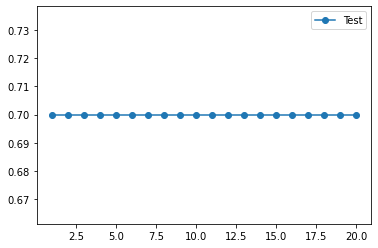

In [169]:
train_scores, test_scores = list(), list()
X_train, X_test, y_train, y_test = train_test_split(X, df['sentiment'], test_size=0.2, random_state=33)
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
 # configure the model
 training = naive_bayes.fit(X_train, y_train)
 test_yhat = training.predict(X_test)
 test_acc = accuracy_score(y_test, test_yhat)
 test_scores.append(test_acc)
 # summarize progress
 print('>%d, test: %.3f' % (i, test_acc))
# plot of train and test scores vs tree depth
# plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

In [170]:
test_yhat = training.predict(X_test)
test_acc = accuracy_score(y_test, test_yhat)
print(test_acc)

0.6998097050428164


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[2652 1063  132]
 [1336 4986 1410]
 [ 694 1044 5601]]


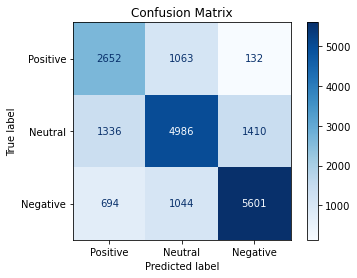

In [171]:
class_names = df['sentiment'].unique()
disp = plot_confusion_matrix(training, X_test, y_test,
                              display_labels=class_names,
                              cmap=plt.cm.Blues, values_format='d')
disp.ax_.set_title("Confusion Matrix")
print(disp.confusion_matrix)

plt.show()

In [80]:
pd = pd.read_csv('datagablabel1.csv')

In [172]:
pd.sentiment.value_counts()

Neutral     39222
Positive    36498
Negative    18864
Name: sentiment, dtype: int64

In [155]:
df.sentiment.value_counts()

Neutral     39224
Positive    36498
Negative    18864
Name: sentiment, dtype: int64

In [173]:
X_train.shape

(75668, 55508)

In [174]:
acc_mnb = accuracy_score(y_test, test_yhat)
print("Accuracy: {0:.4f}".format(acc_mnb))

conf_matrix_mnb = confusion_matrix(y_test, test_yhat)
print("Confusion matrix:\n {}".format(conf_matrix_mnb))
print(classification_report(y_test, test_yhat))

Accuracy: 0.6998
Confusion matrix:
 [[2652 1063  132]
 [1336 4986 1410]
 [ 694 1044 5601]]
              precision    recall  f1-score   support

    Negative       0.57      0.69      0.62      3847
     Neutral       0.70      0.64      0.67      7732
    Positive       0.78      0.76      0.77      7339

    accuracy                           0.70     18918
   macro avg       0.68      0.70      0.69     18918
weighted avg       0.71      0.70      0.70     18918



In [161]:
acc_mnb = accuracy_score(y_test, test_yhat)
print("Accuracy: {0:.4f}".format(acc_mnb))

conf_matrix_mnb = confusion_matrix(y_test, test_yhat)
print("Confusion matrix:\n {}".format(conf_matrix_mnb))
print(classification_report(y_test, test_yhat))

Accuracy: 0.6986
Confusion matrix:
 [[2578 1040  134]
 [1364 5012 1417]
 [ 721 1026 5626]]
              precision    recall  f1-score   support

    Negative       0.55      0.69      0.61      3752
     Neutral       0.71      0.64      0.67      7793
    Positive       0.78      0.76      0.77      7373

    accuracy                           0.70     18918
   macro avg       0.68      0.70      0.69     18918
weighted avg       0.71      0.70      0.70     18918



Iterasi 1: 0.6986996511259118
Iterasi 2: 0.6902949571836346
Iterasi 3: 0.7018712337456391
Iterasi 4: 0.7019769531662966
Iterasi 5: 0.6998097050428164
5
Rata-rata skor akurasi: 69.85 %


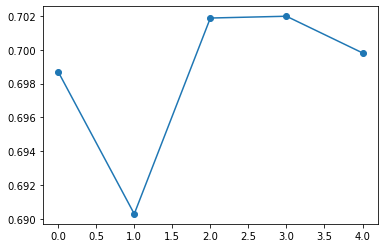

In [162]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
shuffle_split = ShuffleSplit(n_splits=5, test_size=0.2, random_state=2)

# Melakukan cross-validation dengan ShuffleSplit
scores = cross_val_score(naive_bayes, X, df['sentiment'], cv=shuffle_split, scoring='accuracy')
x = []
# Menampilkan skor akurasi untuk setiap iterasi cross-validation
for i, score in enumerate(scores):
    print(f"Iterasi {i+1}: {score}")
    x.append(score)

# Menampilkan rata-rata skor akurasi dari cross-validation
print(len(x))
print("Rata-rata skor akurasi: {:.2f} %".format(scores.mean()*100))
plt.plot(range(len(x)), x, marker='o')

In [163]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Melakukan prediksi pada data uji
y_pred = naive_bayes.predict(X_test)

# Menghitung dan menampilkan akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:{:.2f}%".format(accuracy * 100))

# Menghitung dan menampilkan presisi
precision = precision_score(y_test, y_pred, average='weighted')
print("Presisi: {:.2f}%".format(precision * 100))

# Menghitung dan menampilkan recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:{:.2f}%".format(recall * 100))

# Menghitung dan menampilkan F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:{:.2f}%".format(f1 * 100))
positive_count = (y_pred == 'Positive').sum()
negative_count = (y_pred == 'Negative').sum()
neutral_count = (y_pred == 'Neutral').sum()
total_count = len(y_pred)
positive_percentage = (positive_count / total_count) * 100
negative_percentage = (negative_count / total_count) * 100
neutral_percentage = (neutral_count / total_count) * 100
    # Tampilkan hasil
print("Persentase Klasifikasi:")
print("Positif: {:.1f}%".format(positive_percentage))
print("Negatif: {:.1f}%".format(negative_percentage))
print("Netral: {:.1f}%".format(neutral_percentage))

Akurasi:69.86%
Presisi: 70.69%
Recall:69.86%
F1-score:70.06%
Persentase Klasifikasi:
Positif: 37.9%
Negatif: 24.6%
Netral: 37.4%
